# UK House Price Prediction

Taken from Kaggle:

```
This dataset has been meticulously pre-processed from the official UK government’s Price Paid Data, available for research purposes. The original dataset contains millions of rows spanning from 1995 to 2024, which posed significant challenges for machine learning operations due to its large size. For this project, we focused on house price predictions and filtered the data to only include transactions from 2015 to 2024. The final dataset contains 90,000 randomly sampled records, which should be ideal for training machine learning models efficiently.
The goal of this dataset is to provide a well-structured, pre-processed dataset for students, researchers, and developers interested in creating house price prediction models using UK data. There are limited UK house price datasets available on Kaggle, so this contribution aims to fill that gap, offering a reliable dataset for dissertations, academic projects, or research purposes.
This dataset is tailored for use in supervised learning models and has been cleaned, ensuring the removal of missing values and encoding of categorical variables. We hope this serves as a valuable resource for anyone studying house price prediction or real estate trends in the UK.
In the future, I plan to provide an even larger dataset for more detailed and comprehensive predictions.
```

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from ml_utils import utils

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sklearn.set_config(transform_output='pandas')

In [3]:
import os

base_dir = os.path.dirname(os.path.abspath('__file__')) if '__file__' in locals() else os.getcwd()
file_path = os.path.join(base_dir, 'input', 'uk_house_price.csv')

df = pd.read_csv(file_path, parse_dates=['date'])
df = df.sort_values('date', ascending=True).reset_index(drop=True)
df.head()

,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,county
0,310000,2015-01-02,TN21 9HJ,S,N,F,NORTH CORNER,HORAM,HEATHFIELD,WEALDEN,EAST SUSSEX
1,85000,2015-01-02,NG17 7EH,T,N,F,KINGSWAY,KIRKBY IN ASHFIELD,NOTTINGHAM,ASHFIELD,NOTTINGHAMSHIRE
2,235000,2015-01-02,NG23 7LD,D,N,F,DYKES END,COLLINGHAM,NEWARK,NEWARK AND SHERWOOD,NOTTINGHAMSHIRE
3,368000,2015-01-02,L37 3NU,D,N,L,GORES LANE,FORMBY,LIVERPOOL,SEFTON,MERSEYSIDE
4,365500,2015-01-05,EN8 9RX,S,N,F,GIBBS CLOSE,CHESHUNT,WALTHAM CROSS,BROXBOURNE,HERTFORDSHIRE


## 1st Exploration

### EDA

In [4]:
df.sample(10, random_state=29)

,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,county
73585,100000,2022-03-31,BL1 5JY,T,N,L,DOUGILL STREET,HEATON,BOLTON,BOLTON,GREATER MANCHESTER
70169,260000,2021-11-26,EX5 4BD,S,N,F,CULVERT ROAD,STOKE CANON,EXETER,EAST DEVON,DEVON
5635,110000,2015-08-28,SA11 5LH,S,N,F,BRYNIVOR,PONTWALBY,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT
83004,190000,2023-03-22,CV5 8LQ,S,N,F,LYNDALE ROAD,WHOBERLEY,COVENTRY,COVENTRY,WEST MIDLANDS
56003,127000,2020-10-29,CF82 7TH,T,N,F,CLOS CAE MAWR,PENPEDAIRHEOL,HENGOED,CAERPHILLY,CAERPHILLY
46764,475000,2019-09-30,TN24 9PX,D,N,F,HARRY PAY CLOSE,KENNINGTON,ASHFORD,ASHFORD,KENT
65713,269000,2021-06-30,CA12 4TU,T,N,F,GLENDERAMACKIN TERRACE,THRELKELD,KESWICK,ALLERDALE,CUMBRIA
37628,600000,2018-10-29,CW8 3PE,T,N,F,WELL LANE,WEAVERHAM,NORTHWICH,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER
40126,1000,2019-01-29,GL51 3TS,O,N,F,THE OAKS,UP HATHERLEY,CHELTENHAM,CHELTENHAM,GLOUCESTERSHIRE
56989,172500,2020-11-25,LL53 6LA,T,N,F,GLYNLLIFON TERRACE,NEFYN,PWLLHELI,GWYNEDD,GWYNEDD


In [5]:
utils.skim_data(df)

Total duplicate rows: 43
DF shape: (90000, 11)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,price,int64,0.0,0.0,0.0,6111,6.79,"[310000, 85000, 235000, 368000, 365500]"
1,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
2,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
3,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
4,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
5,freehold,object,0.0,-,-,2,0.00,"[F, L]"
6,street,object,0.0,-,-,43483,48.31,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
7,locality,object,0.0,-,-,10145,11.27,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
8,town,object,0.0,-,-,958,1.06,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
9,district,object,0.0,-,-,359,0.40,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."


In [6]:
# rearrange columns

columns = list(df.columns.values)
columns.pop(0)
columns.append('price')
df = df[columns]
df.sample(10, random_state=29)

,date,postcode,property_type,new_build,freehold,street,locality,town,district,county,price
73585,2022-03-31,BL1 5JY,T,N,L,DOUGILL STREET,HEATON,BOLTON,BOLTON,GREATER MANCHESTER,100000
70169,2021-11-26,EX5 4BD,S,N,F,CULVERT ROAD,STOKE CANON,EXETER,EAST DEVON,DEVON,260000
5635,2015-08-28,SA11 5LH,S,N,F,BRYNIVOR,PONTWALBY,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT,110000
83004,2023-03-22,CV5 8LQ,S,N,F,LYNDALE ROAD,WHOBERLEY,COVENTRY,COVENTRY,WEST MIDLANDS,190000
56003,2020-10-29,CF82 7TH,T,N,F,CLOS CAE MAWR,PENPEDAIRHEOL,HENGOED,CAERPHILLY,CAERPHILLY,127000
46764,2019-09-30,TN24 9PX,D,N,F,HARRY PAY CLOSE,KENNINGTON,ASHFORD,ASHFORD,KENT,475000
65713,2021-06-30,CA12 4TU,T,N,F,GLENDERAMACKIN TERRACE,THRELKELD,KESWICK,ALLERDALE,CUMBRIA,269000
37628,2018-10-29,CW8 3PE,T,N,F,WELL LANE,WEAVERHAM,NORTHWICH,CHESHIRE WEST AND CHESTER,CHESHIRE WEST AND CHESTER,600000
40126,2019-01-29,GL51 3TS,O,N,F,THE OAKS,UP HATHERLEY,CHELTENHAM,CHELTENHAM,GLOUCESTERSHIRE,1000
56989,2020-11-25,LL53 6LA,T,N,F,GLYNLLIFON TERRACE,NEFYN,PWLLHELI,GWYNEDD,GWYNEDD,172500


#### Date

##### Year

In [7]:
df_temp = df.copy()
df_temp['year'] = df_temp['date'].dt.year # type: ignore
df_temp.head()

,date,postcode,property_type,new_build,freehold,street,locality,town,district,county,price,year
0,2015-01-02,TN21 9HJ,S,N,F,NORTH CORNER,HORAM,HEATHFIELD,WEALDEN,EAST SUSSEX,310000,2015
1,2015-01-02,NG17 7EH,T,N,F,KINGSWAY,KIRKBY IN ASHFIELD,NOTTINGHAM,ASHFIELD,NOTTINGHAMSHIRE,85000,2015
2,2015-01-02,NG23 7LD,D,N,F,DYKES END,COLLINGHAM,NEWARK,NEWARK AND SHERWOOD,NOTTINGHAMSHIRE,235000,2015
3,2015-01-02,L37 3NU,D,N,L,GORES LANE,FORMBY,LIVERPOOL,SEFTON,MERSEYSIDE,368000,2015
4,2015-01-05,EN8 9RX,S,N,F,GIBBS CLOSE,CHESHUNT,WALTHAM CROSS,BROXBOURNE,HERTFORDSHIRE,365500,2015


In [8]:
df_temp.groupby('year').size()

year
2015     9331
2016     9919
2017    10218
2018    10134
2019    10018
2020     8876
2021    12736
2022    10278
2023     6854
2024     1636
dtype: int64

##### Month

In [9]:
df_temp = df.copy()
df_temp['month'] = df_temp['date'].dt.month # type: ignore
df_temp['year'] = df_temp['date'].dt.year # type: ignore
df_temp = df_temp.sort_values('month')
df_temp.shape

(90000, 13)

In [10]:
df_temp.sample(10, random_state=29)

,date,postcode,property_type,new_build,freehold,street,locality,town,district,county,price,month,year
87040,2023-10-19,SO53 2HP,S,N,F,HILLCREST AVENUE,CHANDLER'S FORD,EASTLEIGH,EASTLEIGH,HAMPSHIRE,390000,10,2023
56192,2020-10-30,TS25 1DR,S,N,F,GLENTOWER GROVE,SEATON CAREW,HARTLEPOOL,HARTLEPOOL,HARTLEPOOL,127000,10,2020
59196,2021-01-28,WD25 7LJ,D,N,F,HIGH ROAD,LEAVESDEN,WATFORD,WATFORD,HERTFORDSHIRE,860000,1,2021
9047,2015-12-18,PO1 5AR,T,N,F,CORNWALL ROAD,FRATTON,PORTSMOUTH,PORTSMOUTH,PORTSMOUTH,151000,12,2015
44991,2019-08-01,S45 8JD,S,N,F,OLD HALL CLOSE,PILSLEY,CHESTERFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,165000,8,2019
53053,2020-07-07,OX15 5FN,T,N,L,WARMINGTON ROAD,LOWER BRAILES,BANBURY,STRATFORD-ON-AVON,WARWICKSHIRE,164500,7,2020
77969,2022-09-02,SN5 7EJ,T,N,F,DENBECK WOOD,EASTLEAZE,SWINDON,SWINDON,SWINDON,171000,9,2022
75805,2022-06-23,TR27 4QE,S,N,F,FORTH AN TEWENNOW,PHILLACK,HAYLE,CORNWALL,CORNWALL,327000,6,2022
13576,2016-06-22,NN9 6NX,D,N,F,SHELMERDINE RISE,RAUNDS,WELLINGBOROUGH,EAST NORTHAMPTONSHIRE,NORTHAMPTONSHIRE,279950,6,2016
45886,2019-08-30,DN14 0PQ,S,Y,F,THE HEDGEROWS,EGGBOROUGH,GOOLE,SELBY,NORTH YORKSHIRE,134995,8,2019


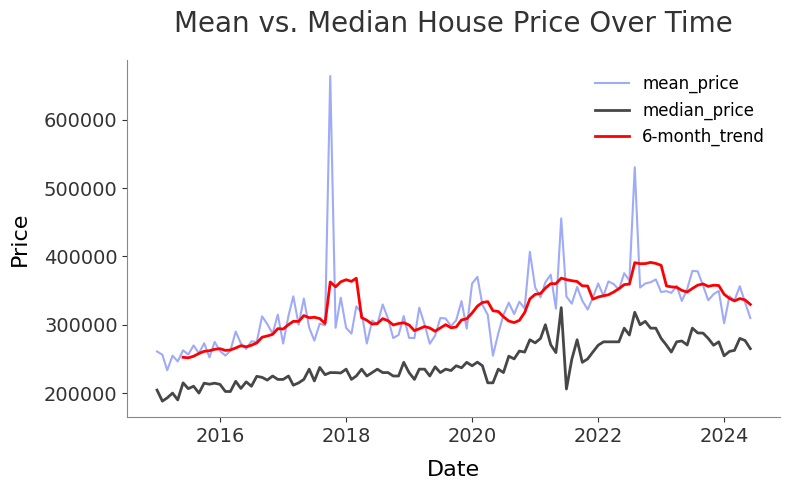

In [11]:
import matplotlib.dates as mdates

df_temp['month_year'] = df_temp['date'].dt.strftime('%Y_%m') # type: ignore
df_temp['month_year'] = pd.to_datetime(df_temp['month_year'], format='%Y_%m')
df_plot = df_temp.groupby('month_year')['price'].agg(['mean', 'median']).reset_index()
df_plot['mean_smooth'] = df_plot['mean'].rolling(window=6).mean()

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_plot['month_year'], df_plot['mean'], color='#5f73f2', alpha=0.6, linewidth=1.5, label='mean_price')
ax.plot(df_plot['month_year'], df_plot['median'], color='#333333', alpha=0.9, linewidth=2, label='median_price')
ax.plot(df_plot['month_year'], df_plot['mean_smooth'], color='red', linewidth=2, label='6-month_trend')

ax.set_title('Mean vs. Median House Price Over Time', fontsize=20, pad=20, color='#333333')
ax.legend(fontsize=12, frameon=False)
ax.set_xlabel('Date', fontsize=16, labelpad=10)
ax.set_ylabel('Price', fontsize=16, labelpad=10)

ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

ax.tick_params(axis='both', which='major', labelsize=14, colors='#333333')

ax.set_facecolor('white')

plt.tight_layout()
plt.show()

#### Street

In [12]:
utils.skim_data(df)

Total duplicate rows: 43
DF shape: (90000, 11)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,43483,48.31,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
6,locality,object,0.0,-,-,10145,11.27,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
7,town,object,0.0,-,-,958,1.06,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
8,district,object,0.0,-,-,359,0.40,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."
9,county,object,0.0,-,-,117,0.13,"[EAST SUSSEX, NOTTINGHAMSHIRE, MERSEYSIDE, HER..."


In [13]:
from rapidfuzz import process, fuzz

def clean_high_cardinality_feature(df, column_name, replace=False):
    df_copy = df.copy()
    df_copy[column_name] = (
        df_copy[column_name]
        .str.lower()
        .str.replace(r'[^\w\s]', ' ', regex=True)
    )

    street_counts = df_copy[column_name].value_counts()
    masters = street_counts[street_counts > 5].index.tolist()
    candidates = street_counts[street_counts <= 5].index.tolist()

    def find_best_match(query, choices, threshold=90):
        result = process.extractOne(query, choices, scorer=fuzz.token_sort_ratio)
        if result and result[1] >= threshold:
            return result[0]
        return query

    corrections = {cand: find_best_match(cand, masters) for cand in candidates}
    if replace:
        df_copy[column_name] = df_copy[column_name].replace(corrections)
    else:
        df_copy[f'{column_name}_cleaned'] = df_copy[column_name].replace(corrections)
    return df_copy

# df_copy = clean_high_cardinality_feature(df, 'street')
# utils.skim_data(df_copy)

#### Locality

In [14]:
# df_copy = clean_high_cardinality_feature(df, 'locality')
# utils.skim_data(df_copy)

#### Town

In [15]:
# df_copy = clean_high_cardinality_feature(df, 'town')
# utils.skim_data(df_copy)

#### District

In [16]:
# df_copy = clean_high_cardinality_feature(df, 'district')
# utils.skim_data(df_copy)

#### County

In [17]:
# df_copy = clean_high_cardinality_feature(df, 'county')
# utils.skim_data(df_copy)

#### Property Type

<Axes: xlabel='property_type'>

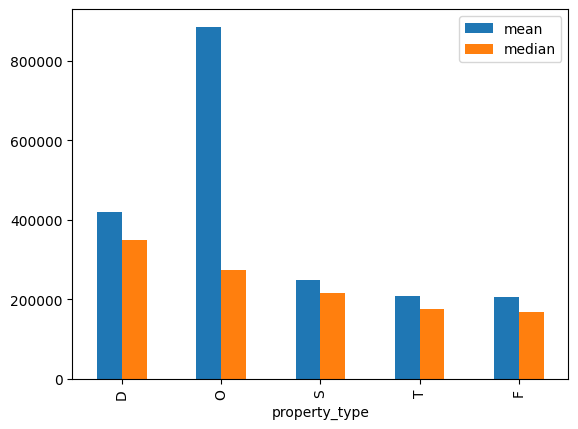

In [18]:
df_temp = df.copy()
(
    df_temp
    .groupby('property_type')['price'].agg(['mean', 'median'])
    .sort_values('median', ascending=False)
    .reset_index(drop=False)
    .plot(x='property_type', kind='bar', y=['mean', 'median'])
)

#### Next Actions

- Data splitting
- Category encoder vs top-n + OHE

In [19]:
utils.skim_data(df)

Total duplicate rows: 43
DF shape: (90000, 11)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,2553,2.84,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,75323,83.69,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,43483,48.31,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
6,locality,object,0.0,-,-,10145,11.27,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
7,town,object,0.0,-,-,958,1.06,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
8,district,object,0.0,-,-,359,0.40,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."
9,county,object,0.0,-,-,117,0.13,"[EAST SUSSEX, NOTTINGHAMSHIRE, MERSEYSIDE, HER..."


### Data Split

In [20]:
df_train = df.loc[df['date'] < '2022']
df_test = df.loc[df['date'] >= '2022']
print(f'Train dataset: {df_train.shape}')
print(f'Test dataset: {df_test.shape}')

Train dataset: (71232, 11)
Test dataset: (18768, 11)


In [21]:
X_train, y_train = df_train.drop(columns=['price']), df_train[['price']]
X_test, y_test = df_test.drop(columns=['price']), df_test[['price']]

### Feature Engineering

#### Fuzzy Cleaner

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class FuzzyCleaningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=90, min_count=5, other_label=None):
        self.threshold = threshold
        self.min_count = min_count
        self.other_label = other_label
        self.masters_ = {}
        self.corrections_ = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in X.columns:
            cleaned_series = X[col].astype(str).str.lower().str.replace(r'[^\w\s]', ' ', regex=True)

            counts = cleaned_series.value_counts()
            masters = counts[counts > self.min_count].index.tolist()
            candidates = counts[counts <= self.min_count].index.tolist()

            col_corrections = {}
            for cand in candidates:
                match = process.extractOne(cand, masters, scorer=fuzz.token_sort_ratio)
                if match and match[1] >= self.threshold:
                    col_corrections[cand] = match[0]

            self.masters_[col] = masters
            self.corrections_[col] = col_corrections
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col in X.columns:
            X[col] = X[col].astype(str).str.lower().str.replace(r'[^\w\s]', ' ', regex=True)
            X[col] = X[col].replace(self.corrections_.get(col, {}))

            if self.other_label:
                masters = self.masters_.get(col, [])
                X[col] = X[col].apply(lambda x: x if x in masters else self.other_label)

        return X

    def get_feature_names_out(self, input_features=None):
        return input_features


#### Top-N + OHE

In [23]:
from sklearn.preprocessing import OneHotEncoder

class TopNOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=3, other_label='other'):
        self.top_n = top_n
        self.other_label = other_label
        self.top_categories_ = {}
        self.ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in X.columns:
            self.top_categories_[col] = X[col].value_counts().index[:self.top_n].tolist()

        X_reduced = self._reduce_categories(X)
        self.ohe.fit(X_reduced)
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        X_reduced = self._reduce_categories(X)
        return self.ohe.transform(X_reduced)

    def _reduce_categories(self, X):
        X_copy = X.copy()
        for col, top_cats in self.top_categories_.items():
            X_copy[col] = X_copy[col].apply(lambda x: x if x in top_cats else self.other_label)
        return X_copy

    def get_feature_names_out(self, input_features=None):
        return self.ohe.get_feature_names_out()


In [24]:
utils.skim_data(df_train)

Total duplicate rows: 42
DF shape: (71232, 11)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,1892,2.66,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,61316,86.08,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,36982,51.92,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
6,locality,object,0.0,-,-,9523,13.37,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
7,town,object,0.0,-,-,946,1.33,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
8,district,object,0.0,-,-,359,0.50,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."
9,county,object,0.0,-,-,117,0.16,"[EAST SUSSEX, NOTTINGHAMSHIRE, MERSEYSIDE, HER..."


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

temp_transformer = ColumnTransformer(
    transformers=[
        (
            'temp',
            (
                Pipeline(
                    steps=[
                        ('fuzzy', FuzzyCleaningTransformer()),
                        ('top_n', TopNOneHotEncoder())
                    ]
                )
            ),
            ['street', 'locality', 'town', 'district', 'county'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)
temp_transformer.set_output(transform='pandas')
temp_transformer.fit_transform(X_train, y_train).head() # type: ignore

,street_high street,street_main street,street_other,street_station road,locality_kingswood,locality_middleton,locality_other,locality_shirley,town_bristol,town_manchester,town_nottingham,town_other,district_birmingham,district_county durham,district_leeds,district_other,county_greater manchester,county_nottinghamshire,county_other,county_west yorkshire,date,postcode,property_type,new_build,freehold
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2015-01-02,TN21 9HJ,S,N,F
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2015-01-02,NG17 7EH,T,N,F
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2015-01-02,NG23 7LD,D,N,F
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2015-01-02,L37 3NU,D,N,L
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2015-01-05,EN8 9RX,S,N,F


#### Binary Mapping

In [26]:
class BinaryMappingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mapping=None):
        self.mapping = mapping if mapping else {
            'Y': 1, 'N': 0,
            'L': 1, 'F': 0
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col in X.columns:
            X[col] = X[col].map(self.mapping)
            X[col] = X[col].fillna(0).astype(int)
        return X

    def get_feature_names_out(self, input_features=None):
        return input_features

#### Target Encoder

In [49]:
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

class ScaledCategoryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoder_class=ce.TargetEncoder, use_scaler=False, **encoder_params):
        self.encoder_class = encoder_class
        self.use_scaler = use_scaler
        self.encoder_params = encoder_params

    def fit(self, X, y=None):
        self.encoder_ = self.encoder_class(**self.encoder_params)
        self.encoder_.fit(X, y)

        if self.use_scaler:
            self.scaler_ = StandardScaler()
            X_encoded = self.encoder_.transform(X)
            self.scaler_.fit(X_encoded)
        return self

    def transform(self, X):
        X_encoded = self.encoder_.transform(X)
        if self.use_scaler:
            return self.scaler_.transform(X_encoded)
        return X_encoded

    def get_feature_names_out(self, input_features=None):
        return self.encoder_.get_feature_names_out(input_features)

#### Date Extractor

In [82]:
class DateFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, features=['year', 'month']):
        self.features = features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        output_df = pd.DataFrame(index=X.index)
        for col in X.columns:
            date_series = pd.to_datetime(X[col], errors='coerce')
            if 'year' in self.features:
                output_df[f'{col}_year'] = date_series.dt.year
            if 'month' in self.features:
                output_df[f'{col}_month'] = date_series.dt.month
        return output_df

    def get_feature_names_out(self, input_features=None):
        feature_names = []
        for col in input_features: # type: ignore
            for feat in self.features:
                feature_names.append(f"{col}_{feat}")
        return np.array(feature_names)

#### Plans

For random forest:

- Run Fuzzy Cleaner, Binary Mapping in column transformer
- Run Top-N OHE, able to experiment the N
- Run Category Encoder without standard scaling
- Discard date and postcode

For linear regression:

- Run Fuzzy cleaner, binary mapping in column transformer
- Run Top-N OHE, able to experiment the N
- Run Category encoder with standard scaling
- Discard date and postcode

Run both against randomized search for speed

### Modeling

#### Baseline

In [54]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)
y_pred_baseline_train = baseline.predict(X_train)
y_pred_baseline_test = baseline.predict(X_test)
base_train_rmse = root_mean_squared_error(y_train, y_pred_baseline_train)
base_train_r2 = r2_score(y_train, y_pred_baseline_train)
base_test_rmse = root_mean_squared_error(y_test, y_pred_baseline_test)
base_test_r2 = r2_score(y_test, y_pred_baseline_test)

print(f'Baseline Train RMSE: {base_train_rmse:.4f}')
print(f'Baseline Train R^2: {base_train_r2:.4f}')
print(f'Baseline Test RMSE: {base_test_rmse:.4f}')
print(f'Baseline Test R^2: {base_test_r2:.4f}')

Baseline Train RMSE: 1362258.0525
Baseline Train R^2: 0.0000
Baseline Test RMSE: 916381.6035
Baseline Test R^2: -0.0029


#### Linear Model

In [83]:
utils.skim_data(X_train)

Total duplicate rows: 137
DF shape: (71232, 10)


,feature,dtype,null_%,negative_%,zero_%,n_unique,unique_%,sample_values
0,date,datetime64[ns],0.0,-,-,1892,2.66,"[2015-01-02 00:00:00, 2015-01-05 00:00:00, 201..."
1,postcode,object,0.0,-,-,61316,86.08,"[TN21 9HJ, NG17 7EH, NG23 7LD, L37 3NU, EN8 9RX]"
2,property_type,object,0.0,-,-,5,0.01,"[S, T, D, F, O]"
3,new_build,object,0.0,-,-,2,0.00,"[N, Y]"
4,freehold,object,0.0,-,-,2,0.00,"[F, L]"
5,street,object,0.0,-,-,36982,51.92,"[NORTH CORNER, KINGSWAY, DYKES END, GORES LANE..."
6,locality,object,0.0,-,-,9523,13.37,"[HORAM, KIRKBY IN ASHFIELD, COLLINGHAM, FORMBY..."
7,town,object,0.0,-,-,946,1.33,"[HEATHFIELD, NOTTINGHAM, NEWARK, LIVERPOOL, WA..."
8,district,object,0.0,-,-,359,0.50,"[WEALDEN, ASHFIELD, NEWARK AND SHERWOOD, SEFTO..."
9,county,object,0.0,-,-,117,0.16,"[EAST SUSSEX, NOTTINGHAMSHIRE, MERSEYSIDE, HER..."


Start training data...


/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:305: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:305: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:305: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` sho

Finished training data...
Best params: {'transformer': FunctionTransformer(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>), 'regressor__preprocess__fuzzy__simplify': ScaledCategoryEncoder(use_scaler=True), 'regressor__preprocess__date__features': ['month'], 'regressor__model__fit_intercept': True}



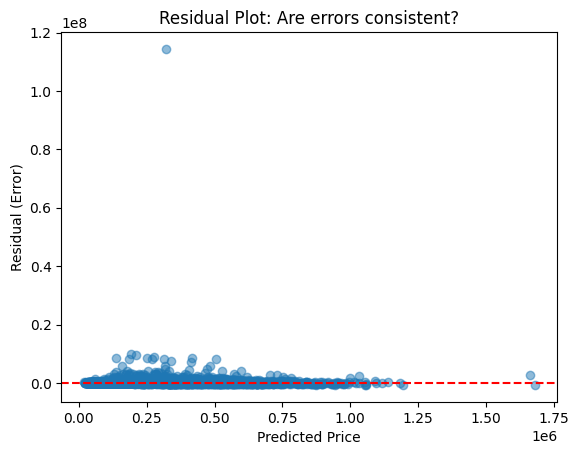

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer

fuzzy_cols = ['street', 'locality', 'town', 'district', 'county']
binary_cols = ['new_build', 'freehold']
ohe_col = ['property_type']
top_n_cols = fuzzy_cols
target_enc_cols = fuzzy_cols

preprocessing = ColumnTransformer(
    transformers=[
        ('date', DateFeatureExtractor(), ['date']),
        ('binary', BinaryMappingTransformer(), binary_cols),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ohe_col),        
        (
            'fuzzy',
            Pipeline(
                steps=[
                    ('fuzzy', FuzzyCleaningTransformer()),
                    ('simplify', ScaledCategoryEncoder(use_scaler=True, smoothing=10))
                ]
            ),
            top_n_cols
        ),
    ],
    remainder='drop',
    verbose_feature_names_out=False
)
# preprocessing.set_output(transform='pandas')
# preprocessing.fit_transform(X_train, y_train).head() # type: ignore
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
identity_transformer = FunctionTransformer()
linear_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessing),
        ('model', LinearRegression())
    ]
)
linear_pipeline = TransformedTargetRegressor(
    regressor=linear_pipeline,
    transformer=identity_transformer
)
param_distributions = {
    'regressor__preprocess__fuzzy__simplify': [
        ScaledCategoryEncoder(use_scaler=True, smoothing=10),
        ScaledCategoryEncoder(use_scaler=False, smoothing=10),
        TopNOneHotEncoder(top_n=3),
        TopNOneHotEncoder(top_n=5),
    ],
    'regressor__preprocess__date__features': [
        ['year'], ['month'], ['year', 'month']
    ],
    'regressor__preprocess__fuzzy__fuzzy': [
        FuzzyCleaningTransformer(), None
    ],
    'regressor__model__fit_intercept': [True, False],
    'transformer': [log_transformer, identity_transformer]
}
ts_split = TimeSeriesSplit(test_size=round(X_train.shape[0] * 0.2))
linear_cv = RandomizedSearchCV(
    linear_pipeline,
    param_distributions=param_distributions,
    cv=ts_split,
    scoring=['neg_root_mean_squared_error', 'r2'],
    refit='neg_root_mean_squared_error',
    random_state=29,
    return_train_score=True,
)
print("Start training data...")
linear_cv.fit(X=X_train, y=y_train)

print("Finished training data...")
print(f"Best params: {linear_cv.best_params_}\n")
best_model = linear_cv.best_estimator_
fitted_pipeline = best_model.regressor_ # type: ignore
model_step = fitted_pipeline.named_steps['model'] # type: ignore
preprocessor_step = fitted_pipeline.named_steps['preprocess'] # type: ignore
y_pred = best_model.predict(X_test) # type: ignore

feature_names = preprocessor_step.get_feature_names_out()
coefficients = model_step.coef_.flatten()

importance_df = pd.DataFrame({'Feature': feature_names, 'Weight': coefficients})
importance_df = importance_df.sort_values(by='Weight', ascending=False)

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Error)')
plt.title('Residual Plot: Are errors consistent?')
plt.show()

In [89]:
importance_df

,Feature,Weight
3,property_type_D,0.332823
8,street,0.281739
9,locality,0.136343
10,town,0.084659
11,district,0.062857
1,new_build,0.035834
6,property_type_S,0.035555
12,county,0.011701
0,date_month,0.002898
2,freehold,-0.012583


In [90]:
print(f'RMSE: {root_mean_squared_error(y_test, y_pred):.4f}')
print(f'r^2: {r2_score(y_test, y_pred):.4f}')

RMSE: 908546.3432
r^2: 0.0142


In [91]:
df_results = pd.DataFrame(linear_cv.cv_results_)
check_fit = df_results[[
    'param_transformer', 
    'mean_train_neg_root_mean_squared_error', 
    'mean_test_neg_root_mean_squared_error',
    'mean_train_r2',
    'mean_test_r2'
]].copy()
check_fit['mean_train_rmse'] = -check_fit['mean_train_neg_root_mean_squared_error']
check_fit['mean_test_rmse'] = -check_fit['mean_test_neg_root_mean_squared_error']

print(check_fit[['mean_train_rmse', 'mean_test_rmse', 'mean_train_r2', 'mean_test_r2']])

   mean_train_rmse  mean_test_rmse  mean_train_r2  mean_test_r2
0     9.839090e+05    1.071593e+06       0.308987 -9.617173e-03
1     7.838997e+05    1.079774e+06       0.578557 -2.930673e-02
2     9.839987e+05    1.071786e+06       0.308791 -1.498393e-02
3     1.009875e+06    8.154170e+15       0.213964 -3.513131e+21
4     7.838997e+05    1.079813e+06       0.578557 -2.956161e-02
5     7.839061e+05    1.079780e+06       0.578549 -2.929286e-02
6     7.839283e+05    1.079953e+06       0.578527 -2.954577e-02
7     9.839090e+05    1.072809e+06       0.308987 -1.799762e-02
8     9.839519e+05    1.071906e+06       0.308892 -1.616458e-02
9     1.009851e+06    1.073116e+06       0.214003 -1.417016e-02


#### RandomForest

Start training data...


/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/bening/Code/_data_portfolios/house-price/.venv/lib/python3.12/site-pa

Finished training data...
Best params: {'preprocess__fuzzy__simplify': ScaledCategoryEncoder(), 'preprocess__date__features': ['year', 'month'], 'model__n_estimators': 500, 'model__min_samples_split': 8, 'model__min_samples_leaf': 7, 'model__max_features': 'sqrt', 'model__max_depth': 7, 'model__bootstrap': False}



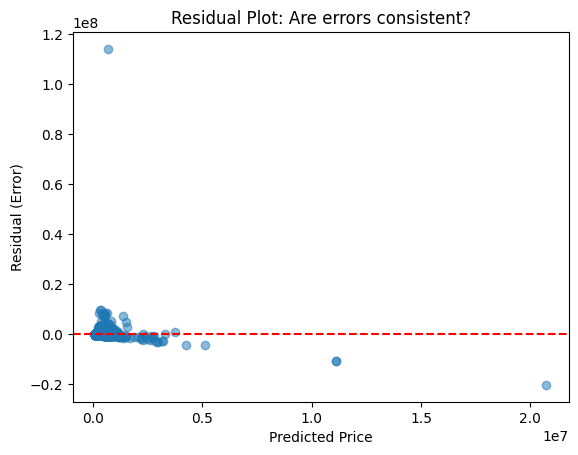

In [93]:
from sklearn.ensemble import RandomForestRegressor

fuzzy_cols = ['street', 'locality', 'town', 'district', 'county']
binary_cols = ['new_build', 'freehold']
ohe_col = ['property_type']
top_n_cols = fuzzy_cols
target_enc_cols = fuzzy_cols

preprocessing = ColumnTransformer(
    transformers=[
        ('date', DateFeatureExtractor(), ['date']),
        ('binary', BinaryMappingTransformer(), binary_cols),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ohe_col),        
        (
            'fuzzy',
            Pipeline(
                steps=[
                    ('fuzzy', FuzzyCleaningTransformer()),
                    ('simplify', ScaledCategoryEncoder(use_scaler=True, smoothing=10))
                ]
            ),
            top_n_cols
        ),
    ],
    remainder='drop',
    verbose_feature_names_out=False
)
rf_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessing),
        ('model', RandomForestRegressor(random_state=29))
    ]
)
param_distributions = {
    'preprocess__fuzzy__simplify': [
        ScaledCategoryEncoder(use_scaler=True, smoothing=10),
        ScaledCategoryEncoder(use_scaler=False, smoothing=10),
        TopNOneHotEncoder(top_n=3),
        TopNOneHotEncoder(top_n=5),
    ],
    'preprocess__date__features': [
        ['year'], ['month'], ['year', 'month']
    ],
    'model__n_estimators': [50, 100, 250, 500],
    'model__max_depth': [7, 10, 20, 40],
    'model__max_features': [1.0, 'sqrt', 'log2'],
    'model__min_samples_split': [2, 4, 6, 8],
    'model__min_samples_leaf': [1, 3, 5, 7],
    'model__bootstrap': [True, False]
}
ts_split = TimeSeriesSplit(test_size=round(X_train.shape[0] * 0.2))
rf_cv = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_distributions,
    cv=ts_split,
    scoring=['neg_root_mean_squared_error', 'r2'],
    refit='neg_root_mean_squared_error',
    random_state=29,
    return_train_score=True,
)
print("Start training data...")
rf_cv.fit(X=X_train, y=y_train)

print("Finished training data...")
print(f"Best params: {rf_cv.best_params_}\n")
best_model = rf_cv.best_estimator_
model_step = best_model.named_steps['model'] # type: ignore
preprocessor_step = best_model.named_steps['preprocess'] # type: ignore
y_pred = best_model.predict(X_test) # type: ignore

feature_names = preprocessor_step.get_feature_names_out()
importances = model_step.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

residuals = y_test.values.flatten() - y_pred.flatten()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Error)')
plt.title('Residual Plot: Are errors consistent?')
plt.show()

In [94]:
print(f'RMSE: {root_mean_squared_error(y_test, y_pred):.4f}')
print(f'r^2: {r2_score(y_test, y_pred):.4f}')

RMSE: 918358.8137
r^2: -0.0073


In [97]:
df_results = pd.DataFrame(rf_cv.cv_results_)
check_fit = df_results[[
    'mean_train_neg_root_mean_squared_error', 
    'mean_test_neg_root_mean_squared_error',
    'mean_train_r2',
    'mean_test_r2'
]].copy()
check_fit['mean_train_rmse'] = -check_fit['mean_train_neg_root_mean_squared_error']
check_fit['mean_test_rmse'] = -check_fit['mean_test_neg_root_mean_squared_error']

print(check_fit[['mean_train_rmse', 'mean_test_rmse', 'mean_train_r2', 'mean_test_r2']])

   mean_train_rmse  mean_test_rmse  mean_train_r2  mean_test_r2
0     7.795392e+05    1.070897e+06       0.412929     -0.001134
1     8.322174e+05    1.069644e+06       0.351179      0.004462
2     6.841331e+05    1.069925e+06       0.651116     -0.007101
3     7.645974e+05    1.069699e+06       0.413566     -0.003143
4     8.319816e+05    1.069714e+06       0.352068      0.005666
5     7.906920e+05    1.073372e+06       0.402428     -0.004986
6     1.010722e+06    1.088112e+06       0.061840     -0.066009
7     8.208077e+05    1.093831e+06       0.372547     -0.036057
8     1.016100e+06    1.089810e+06       0.051227     -0.101318
9     7.940521e+05    1.083547e+06       0.398520     -0.031448


### Conclusion

Both the Linear Regression and Random Forest models yielded unacceptable results, demonstrating almost no predictive power.

### Recommendations

- Conduct a more thorough investigation of price distributions. Specifically, compare pricing in high-transaction areas to determine if these locations are inherently affluent or if the data is being skewed by outliers.
- Integrate additional time-based variables, such as seasonal sales trends, annual volume, and regional average prices (calculated monthly, quarterly, or annually).